# Scrape the Location Counts

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

/Users/OwenBarberie/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# gather and parse the webpage
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
soup = BeautifulSoup(response.content, "html.parser")

# find target table
table = soup.find("table", class_="wpr-table")

# state names from the header
states_list = [th.get_text(strip=True) for th in table.find_all("th")[4:]]

# collect rows of data, dictionary for each row
rows = []
for i, tr in enumerate(table.find_all("tr")[1:]): 
    cells = tr.find_all("td")
    row_data = {
        "state": states_list[i],
        "2023": (cells[0].find("a") or cells[0]).get_text(strip=True),
        "2021": (cells[1].find("a") or cells[1]).get_text(strip=True),
        "2024": (cells[2].find("a") or cells[2]).get_text(strip=True)
    }
    rows.append(row_data)

# dictionaries to a DataFrame
starbucks = pd.DataFrame(rows)

# wide to long format
starbucks_clean = starbucks.melt(id_vars=["state"], var_name="year", value_name="store_count")
starbucks_clean["location"] = "Starbucks"


In [3]:
starbucks_clean

,state,year,store_count,location
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks
...,...,...,...,...
148,South Dakota,2024,,Starbucks
149,West Virginia,2024,,Starbucks
150,Wyoming,2024,,Starbucks
151,North Dakota,2024,,Starbucks


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# gather and parse the webpage
response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
soup = BeautifulSoup(response.content, "html.parser")

# find target table
table = soup.find("table", class_="wpr-table")

# state names from the header
states_list = [th.get_text(strip=True) for th in table.find_all("th")[3:]]

# collect rows of data, dictionary for each row
rows = []
for i, tr in enumerate(table.find_all("tr")[1:]):
    cells = tr.find_all("td")
    row_data = {
        "state": states_list[i],
        "2024": (cells[0].find("a") or cells[0]).get_text(strip=True),
        "2023": (cells[1].find("a") or cells[1]).get_text(strip=True)
    }
    rows.append(row_data)

# dictionaries to a DataFrame
dunkin = pd.DataFrame(rows)

# wide to long format
dunkin_clean = dunkin.melt(id_vars=["state"], var_name="year", value_name="store_count")
dunkin_clean["location"] = "Dunkin"
dunkin_clean


,state,year,store_count,location
0,New York,2024,"1,431",Dunkin
1,Massachusetts,2024,"1,042",Dunkin
2,Florida,2024,909,Dunkin
3,New Jersey,2024,872,Dunkin
4,Illinois,2024,711,Dunkin
...,...,...,...,...
97,Montana,2023,0,Dunkin
98,North Dakota,2023,0,Dunkin
99,Oregon,2023,0,Dunkin
100,South Dakota,2023,0,Dunkin


In [8]:
# merge all the coffee
merged = pd.merge(starbucks_clean, dunkin_clean, on=["state", "year", "location", "store_count"], how="outer")
merged['year'] = merged['year'].astype(int)
merged.fillna('Data Not Available', inplace=True)


# Supplemental Data

In [9]:
# gather and parse the webpage
response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
soup = BeautifulSoup(response.content, "html.parser")

In [17]:
tables = soup.find_all("table", class_ = "wikitable")
table = tables[0]
rows = []
for tr in table.find_all("tr")[1:]:
    cells = tr.find_all("td")

    state_tag = cells[2].find("a") or cells[2]
    state = state_tag.get_text(strip = True)

    pop_tag = cells[3].find("a") or cells[3]
    population = pop_tag.get_text(strip = True)

    rows.append({
        "state" : state,
        "population" : population
    })

In [18]:
population = pd.DataFrame(rows)
population.head()

,state,population
0,California,"39,538,223"
1,Texas,"30,145,505"
2,Florida,"21,538,187"
3,New York,"20,201,249"
4,Pennsylvania,"13,002,700"


In [19]:
mergedpop = merged.merge(population, on = "state", how = "left")
mergedpop

,state,year,store_count,location,population
0,Alabama,2021,99,Starbucks,"5,024,279"
1,Alabama,2023,59,Dunkin,"5,024,279"
2,Alabama,2023,85,Starbucks,"5,024,279"
3,Alabama,2024,69,Dunkin,"5,024,279"
4,Alabama,2024,,Starbucks,"5,024,279"
...,...,...,...,...,...
250,Wyoming,2021,26,Starbucks,"576,851"
251,Wyoming,2023,1,Dunkin,"576,851"
252,Wyoming,2023,23,Starbucks,"576,851"
253,Wyoming,2024,1,Dunkin,"576,851"


In [41]:
# Manually create starbucks revenue table
data = {
    "year": [2021, 2023, 2024],
    "Revenue (in billions)": [29.061, 35.976, 36.2],
}

# Create the DataFrame
starbucks_revenue_df = pd.DataFrame(data)
starbucks_revenue_df["location"] = "Starbucks"
# Display the DataFrame
print(starbucks_revenue_df)


   year  Revenue (in billions)   location
0  2021                 29.061  Starbucks
1  2023                 35.976  Starbucks
2  2024                 36.200  Starbucks
   year  Revenue (in billions)   location
0  2021                 29.061  Starbucks
1  2023                 35.976  Starbucks
2  2024                 36.200  Starbucks


In [39]:
# Manually create dunkin revenue table
data = {
    "year": [2023, 2024],
    "Revenue (in billions)": [1.4, 1.37]
}

# Create the DataFrame
dunkin_revenue_df = pd.DataFrame(data)
dunkin_revenue_df["location"] = "Dunkin"
# Display the DataFrame
dunkin_revenue_df

,year,Revenue (in billions),location
0,2023,1.40,Dunkin
1,2024,1.37,Dunkin


In [42]:
# Merge the revenue data for starbucks and dunkin based on relevant years
#merged_df = pd.merge(starbucks_revenue_df, dunkin_revenue_df, on="Revenue(in billions)", how="inner")
merged_df = pd.concat([starbucks_revenue_df, dunkin_revenue_df], ignore_index=True)

# Display the merged DataFrame
merged_df



,year,Revenue (in billions),location
0,2021,29.061,Starbucks
1,2023,35.976,Starbucks
2,2024,36.200,Starbucks
3,2023,1.400,Dunkin
4,2024,1.370,Dunkin


In [44]:
# Merge revenue data with total table with pop, state, year, location
final_merge = mergedpop.merge(merged_df, on = ["location", "year"], how = "left")
final_merge


,state,year,store_count,location,population,Revenue (in billions)
0,Alabama,2021,99,Starbucks,"5,024,279",29.061
1,Alabama,2023,59,Dunkin,"5,024,279",1.400
2,Alabama,2023,85,Starbucks,"5,024,279",35.976
3,Alabama,2024,69,Dunkin,"5,024,279",1.370
4,Alabama,2024,,Starbucks,"5,024,279",36.200
...,...,...,...,...,...,...
250,Wyoming,2021,26,Starbucks,"576,851",29.061
251,Wyoming,2023,1,Dunkin,"576,851",1.400
252,Wyoming,2023,23,Starbucks,"576,851",35.976
253,Wyoming,2024,1,Dunkin,"576,851",1.370


In [45]:
# Create a regions column based on the state variable
region_states = {
    "Northeast": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", 
        "Vermont", "New Jersey", "New York", "Pennsylvania"
    ],
    "Midwest": [
        "Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", 
        "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", 
        "South Dakota"
    ],
    "South": [
        "Delaware", "Maryland", "Washington, D.C.", "Alabama", "Arkansas", 
        "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi", 
        "North Carolina", "South Carolina", "Tennessee", "Virginia", 
        "West Virginia", "Oklahoma", "Texas"
    ],
    "West": [
        "Arizona", "New Mexico", "Alaska", "California", "Hawaii", 
        "Nevada", "Oregon", "Washington", "Colorado", "Idaho", 
        "Montana", "Utah", "Wyoming"
    ]
}
# Create a list of tuples containing each state and its corresponding region
state_region_pairs = [
    (state, region) 
    for region, states in region_states.items() 
    for state in states
]

# Convert the list of tuples into a DataFrame
region_df = pd.DataFrame(state_region_pairs, columns=['state', 'Region'])

# Merge the regions DataFrame with the existing dataset
combined_data = final_merge.merge(region_df, on="state", how="left")

# Display the final DataFrame
combined_data

,state,year,store_count,location,population,Revenue (in billions),Region
0,Alabama,2021,99,Starbucks,"5,024,279",29.061,South
1,Alabama,2023,59,Dunkin,"5,024,279",1.400,South
2,Alabama,2023,85,Starbucks,"5,024,279",35.976,South
3,Alabama,2024,69,Dunkin,"5,024,279",1.370,South
4,Alabama,2024,,Starbucks,"5,024,279",36.200,South
...,...,...,...,...,...,...,...
250,Wyoming,2021,26,Starbucks,"576,851",29.061,West
251,Wyoming,2023,1,Dunkin,"576,851",1.400,West
252,Wyoming,2023,23,Starbucks,"576,851",35.976,West
253,Wyoming,2024,1,Dunkin,"576,851",1.370,West


# Analyze

To compare the two companies, it is important to understand some context around the data we have. For starters, Dunkin is not a public company anymore so the revenue data is predicted based on public information. Additionally, 2023 and 2024 are the two years that can be compared due to the limits of the data. That being, dunkin only having data for 2023 and 2024, so to compare the two, 2021 is being left out for starbucks. 

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/pprint.py:596: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


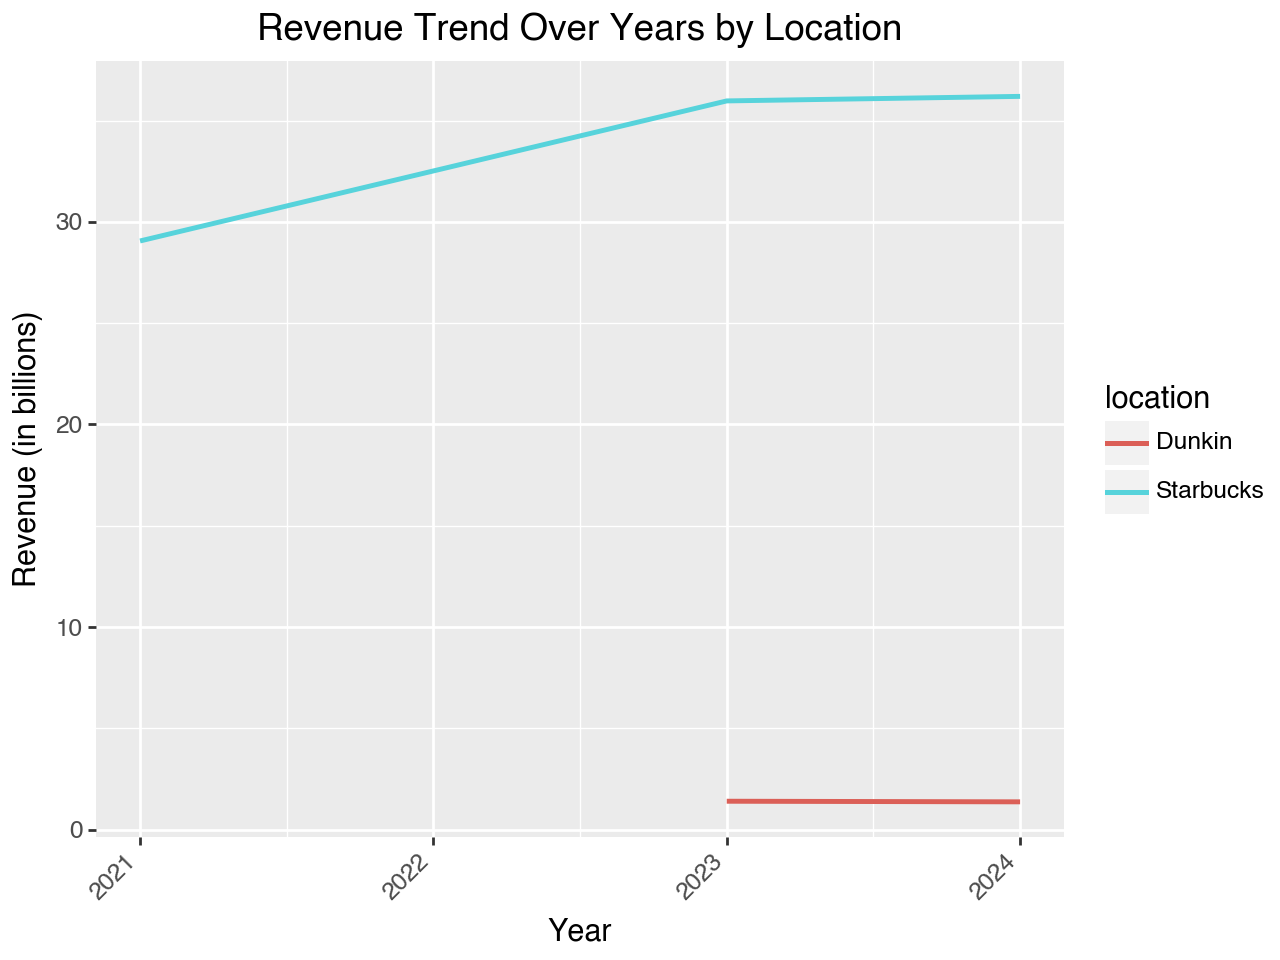

In [145]:
combined_data['Revenue (in billions)'] = pd.to_numeric(combined_data['Revenue (in billions)'], errors='coerce')

# Create the line plot for revenue changes over the years by location
plot = (ggplot(combined_data, aes(x='year', y='Revenue (in billions)', color='location', group='location'))
        + geom_line(size=1)
        + labs(title="Revenue Trend Over Years by Location",
               x="Year",
               y="Revenue (in billions)")
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
       )

This line chart shows the revenue trend for Starbucks and Dunkin over the years 2021 to 2024. Starbucks displays a consistent upward trend, indicating steady revenue growth, while Dunkin's revenue remains significantly lower with minimal change across the years. This suggests that Starbucks has a stronger revenue performance and growth trajectory compared to Dunkin during this period.

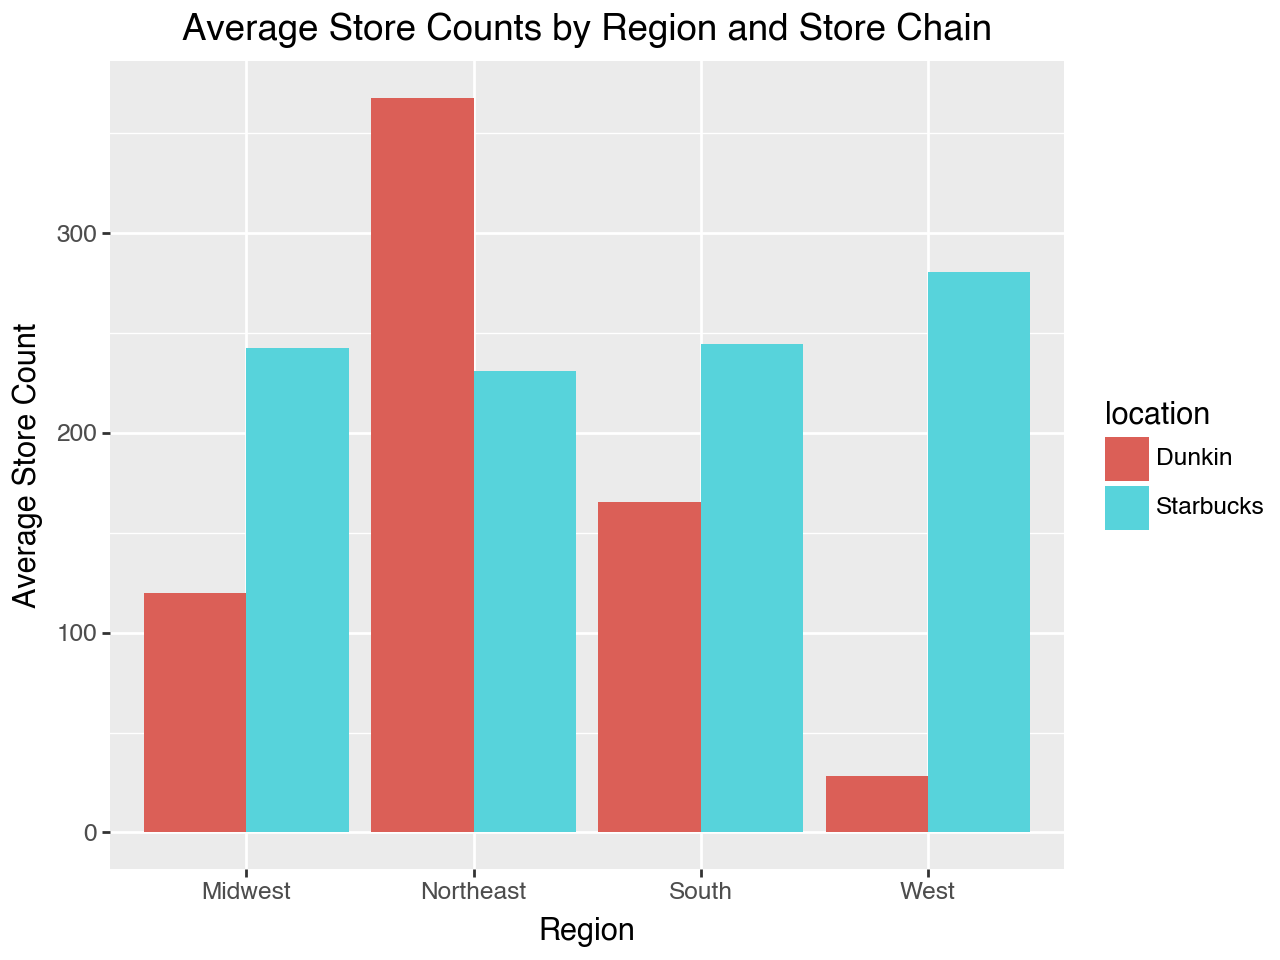

In [117]:
# ensure 'Count' column is numeric, with invalid parsing set to NaN
combined_data['store_count'] = combined_data['store_count'].apply(pd.to_numeric, errors='coerce')

# Calculate the average count per store in each region
avg_counts_by_region = (combined_data
                        .groupby(['Region', 'location'])
                        .agg(avg_count=('store_count', 'mean'))
                        .reset_index())

# Generate bar plot showing average counts by region and store
(ggplot(avg_counts_by_region, aes(x='Region', y='avg_count', fill='location'))
    + geom_bar(stat='identity', position='dodge')
    + labs(title="Average Store Counts by Region and Store Chain", 
           y="Average Store Count", 
           x="Region")
)


This visualization compares the average store counts for Dunkin and Starbucks across different U.S. regions. Dunkin has a significantly higher presence in the Northeast, while Starbucks has a larger footprint in the West, South, and Midwest. Starbucks generally has a more balanced distribution across regions, whereas Dunkin is more concentrated in the Northeast and has minimal presence in the West. This highlights each chain's regional focus and potential areas for expansion if they seek to balance their distribution. 

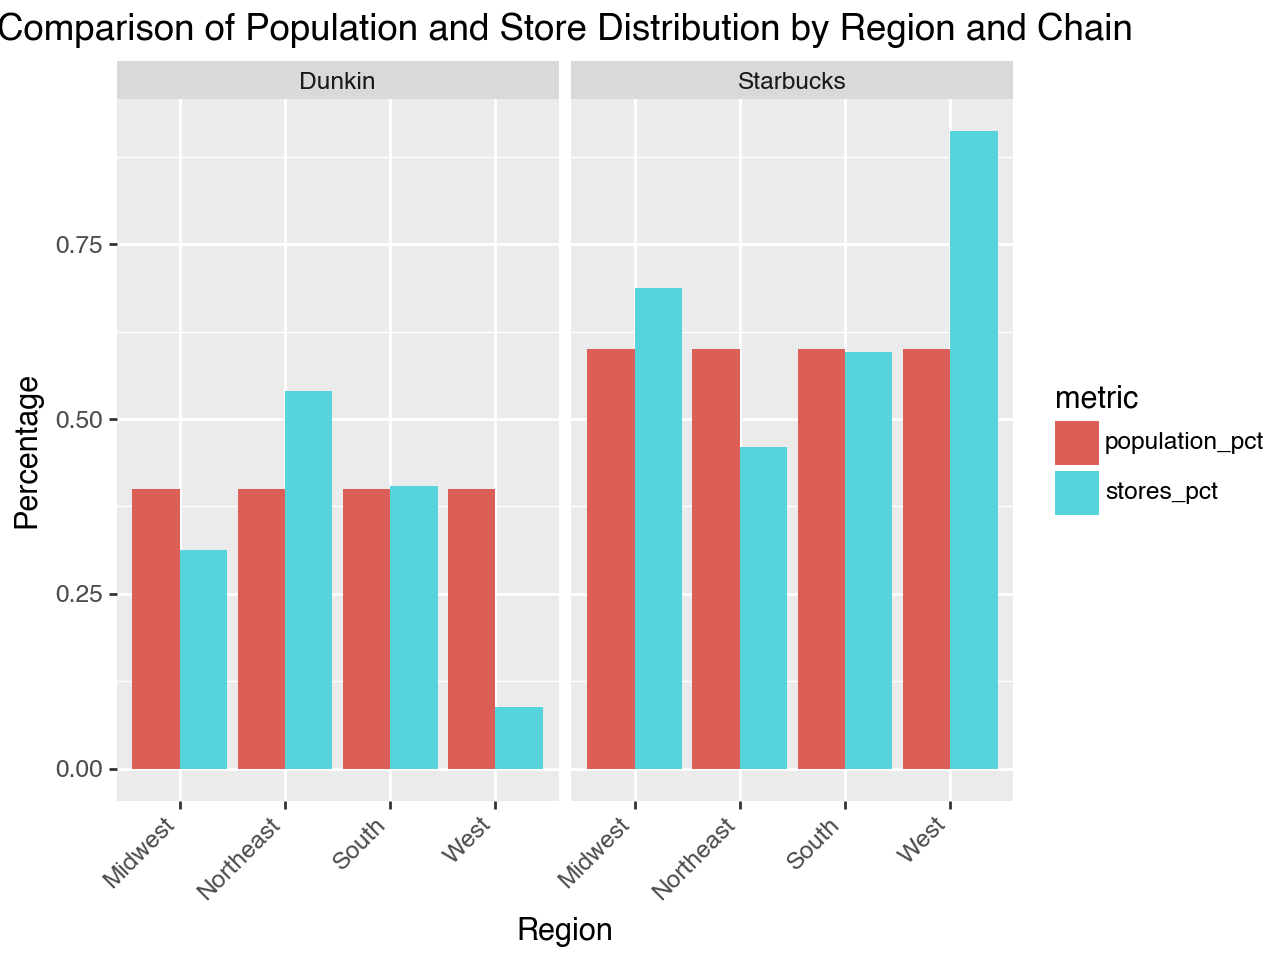

In [180]:
region_summary = combined_data.groupby(['Region', 'location']).agg(
    total_population=('population', 'sum'),
    total_stores=('store_count', 'sum')
).reset_index()

# Calculate proportions
region_summary['population_pct'] = region_summary.groupby('Region')['total_population'].transform(lambda x: x / x.sum())
region_summary['stores_pct'] = region_summary.groupby('Region')['total_stores'].transform(lambda x: x / x.sum())

# Melt the data for easier plotting
region_long = region_summary.melt(id_vars=['Region', 'location'], 
                                  value_vars=['population_pct', 'stores_pct'], 
                                  var_name='metric', value_name='percentage')

# Create stacked bar chart
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, position_dodge, facet_wrap

(ggplot(region_long, aes(x='Region', y='percentage', fill='metric'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('~location', ncol=2)  # Separate panels for each chain
        + labs(title="Comparison of Population and Store Distribution by Region and Chain",
               y="Percentage", 
               x="Region")
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
)





This visualization shows that Dunkin is overrepresented in the Northeast and underrepresented in the Midwest, while Starbucks is overrepresented in the West. Both chains exhibit some alignment with population distribution in certain regions: Dunkin aligns better in the South and West, while Starbucks is more balanced in the Midwest, Northeast, and South. Overall, neither chain perfectly matches the population distribution across all regions, indicating potential areas for re-evaluation in store distribution strategy.

# Automate

In [176]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

def extract_store_data(url):
    # Fetch page content and parse it
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract company name from the URL
    company = re.search(r'state-rankings/(.*?)-by-state', url)
    company_name = company.group(1).replace('-', ' ').title() if company else "Unknown Company"

    # Locate the table and initialize headers and data lists
    data_table = soup.find('table', class_='wpr-table')
    columns = [col.get_text(strip=True) for col in data_table.find_all('th')[3:]]
    headers, states, table_rows = [], [], []

    # Build headers from table, with state names as additional headers
    for header_cell in data_table.find_all('th', class_="datatable-th"):
        headers.append(header_cell.get_text(strip=True))
    header_count = len(data_table.find_all('th', class_="datatable-th"))

    # Collect state names after primary headers
    for header_cell in data_table.find_all('th')[header_count:]:
        states.append(header_cell.get_text(strip=True))

    # Extract data row-by-row and map to headers
    for i, row in enumerate(data_table.find_all('tr')[1:]):
        row_cells = row.find_all('td')
        row_data = {"State": states[i]}
        for j, cell in enumerate(row_cells):
            cell_content = cell.find("a") or cell
            row_data[headers[j + 1]] = cell_content.get_text(strip=True)
        table_rows.append(row_data)

    # Transform list of dictionaries to DataFrame
    data = pd.DataFrame(table_rows)
    long_format_data = data.melt(id_vars="State", var_name="Year_Store", value_name="Count")

    # Separate store name and year
    long_format_data["Store"] = long_format_data["Year_Store"].apply(lambda x: x.split()[0])
    long_format_data["Year"] = long_format_data["Year_Store"].apply(lambda x: re.search(r'(\d{4})', x).group(0) if re.search(r'(\d{4})', x) else None)

    return long_format_data

In [179]:
# Test the function
url = "https://worldpopulationreview.com/state-rankings/in-n-out-by-state"
extract_store_data(url)

,State,Year_Store,Count,Store,Year
0,California,In-N-Out Locations 2024,276,In-N-Out,2024
1,Texas,In-N-Out Locations 2024,43,In-N-Out,2024
2,Arizona,In-N-Out Locations 2024,35,In-N-Out,2024
3,Nevada,In-N-Out Locations 2024,23,In-N-Out,2024
4,Utah,In-N-Out Locations 2024,13,In-N-Out,2024
...,...,...,...,...,...
95,Virginia,In-N-Out Locations 2023,,In-N-Out,2023
96,Washington,In-N-Out Locations 2023,,In-N-Out,2023
97,West Virginia,In-N-Out Locations 2023,,In-N-Out,2023
98,Wisconsin,In-N-Out Locations 2023,,In-N-Out,2023


# Appendix

ChatGPT suggested the enumerate function to iterate while indexing over my data. Additionally, ChatGPT was used to streamline the process of mapping states to regions and creating the new column. ChatGPT assisted in getting rid of null values for the visualization that demonstrates avg store count accross region for dunkin and starbucks. Additionally, ChatGPT helped with a bunch of the syntax for writing my webscraping function at the end of the lab. 
Starbucks rev 2021, 2022, 2023: https://www.macrotrends.net/stocks/charts/SBUX/starbucks/revenue
Starbucks predicted rev for 2024: https://investor.starbucks.com/news/financial-releases/news-details/2024/Starbucks-Reports-Preliminary-Q4-and-Full-Fiscal-Year-2024-Results/default.aspx#:~:text=For%20the%20full%20fiscal%20year,on%20a%20constant%20currency%20basis.
Dunkin predicted rev 2024: https://www.statista.com/topics/5531/dunkin-brands/#:~:text=Published%20by%20Statista%20Research%20Department,Quick%2DService%20&%20Casual%20Dining%20Restaurants
Dunkin rev 2023: https://www.zippia.com/dunkin-donuts-careers-554008/revenue/